Task 5 - Sales Prediction using python

Import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Load CSV file into pandas data frame

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

Data Analysis

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape 

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

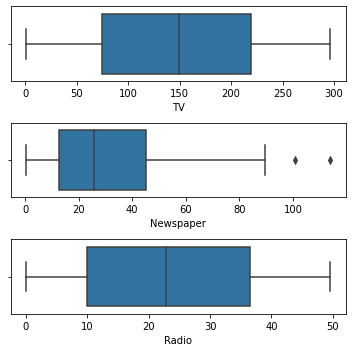

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

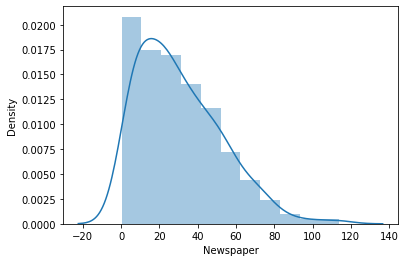

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

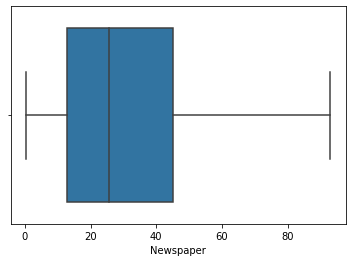

In [ ]:
sns.boxplot(data['Newspaper'])

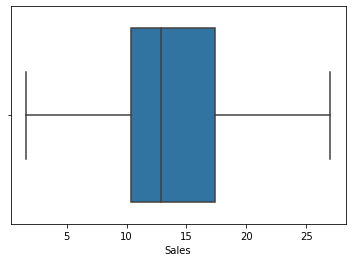

In [ ]:
sns.boxplot(data['Sales']);

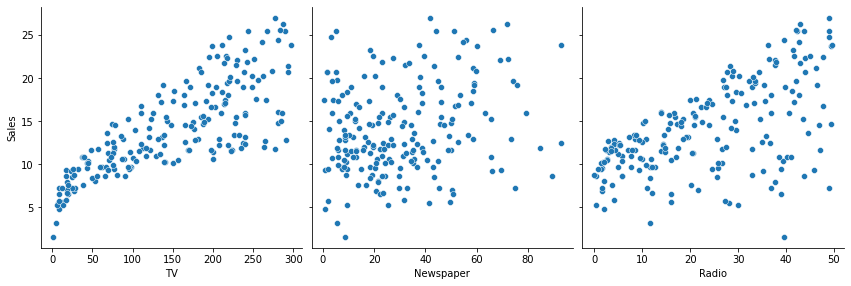

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

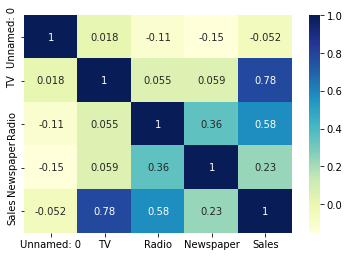

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)

Splitting training and testing data

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


Model Training 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)

In [ ]:
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[16.94 16.24  9.44 17.1  10.48 11.5  14.28  6.22 10.32 13.4  14.18 16.9
 17.2  21.44 16.12 12.48 13.7   7.44 10.68 20.02 18.92 12.48 14.12 13.76
  4.6  13.06 12.48 14.44 16.74 15.94 17.58  7.7  10.   16.12 11.22 16.62
 13.7  19.26  8.66 17.88 20.8  13.38 10.32 16.12 15.6  11.22 18.32 17.88
 17.1  13.78 19.42 12.88 16.12 13.94  9.72 13.76  9.72  7.78 10.26  4.6
  9.6  12.96 12.48 11.22 11.22 16.42  7.7   7.78 20.8  14.12 18.34 13.98
  7.78 14.44 14.6   6.9  12.88 18.34 19.96 13.7   4.6   9.6  13.   15.92
  7.44 16.34 15.76 15.6  16.94 16.34 10.68 20.02 16.62 19.   18.92  7.7
  5.74  9.6   7.78 20.02 21.04 11.22 14.44 14.18 15.36 10.74 13.94 16.2
 16.52 11.04 12.08 16.42 12.48 14.7  17.9   7.36 12.88 18.26 15.92 17.1
 17.58 19.14 13.58 18.92 18.32 14.6  18.34 14.66 13.76 18.34 17.52  8.66
 12.08 18.34] [ 7.44 12.48 10.5  16.62 16.2  18.32 13.38 12.48 13.96 16.42 15.6  10.74
 17.2  18.34  7.7  18.26 13.96 21.04 11.02 12.88 16.42 12.08 14.18 16.42
 13.76 10.   17.9  11.5  17.36 16.42  5.74

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6476799408785606
RMSE: 3.2108697962522315


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.63564,0.64768,3.21087,-0.01204


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    7.283409
x1       0.044324
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     169.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.05e-25
Time:                        06:16:38   Log-Likelihood:                -353.03
No. Observations:                 134   AIC:                             710.1
Df Residuals:                     132   BIC:                             715.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2834      0.586     12.422      0.0

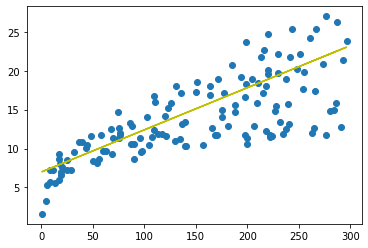

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

188   -4.059959
180   -3.724485
170   -1.099589
0      4.617730
24    -0.344769
         ...   
33    -1.655757
142    3.043237
91    -1.251064
65    -1.041738
25    -6.936084
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([19.95995888, 14.224485  ,  9.49958921, 17.48226962, 10.04476949,
       10.28854929, 14.87604193,  7.66902451,  9.0341914 , 12.04376386,
       14.6233974 , 19.702882  , 16.62239178, 18.29339151, 16.10823801,
       10.66529989, 12.15014051,  8.39593156, 11.59166314, 20.42092433,
       16.96811586, 10.66973225, 13.09423319, 12.64656483,  7.46513595,
       13.32028355, 10.62097629, 17.80583191, 17.35373118, 15.29711613,
       16.4539621 ,  8.14328704, 11.54733954, 16.13926453, 11.14842714,
       15.61181369, 12.19003175, 18.06290879,  8.6796026 , 19.5477494 ,
       18.60365671, 13.91865216,  8.91895004, 16.13926453, 15.12868645,
       11.29026266, 16.8307127 , 19.55661412, 17.45567546, 12.28754367,
       16.9636835 , 13.50201032, 16.09937329, 14.52145312,  9.65472181,
       12.73964439,  9.42423909,  8.07680164,  9.2558094 ,  7.52275663,
        9.77439553, 12.47813515, 10.59438213, 11.08194174, 11.25923614,
       17.92550563,  8.15215176,  8.04577511, 18.53273895, 13.23

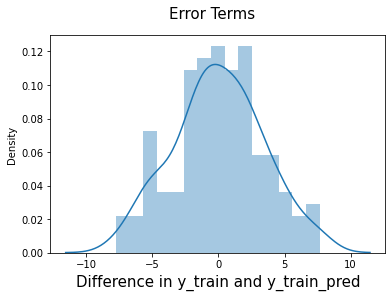

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

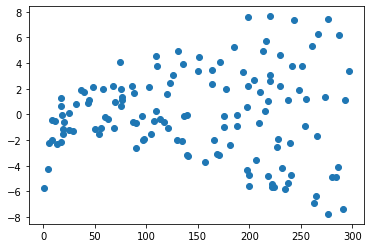

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([ 8.33831088, 10.62984101, 10.21319917, 15.63397549, 15.47884289,
       16.79968618, 13.92308452, 10.53676145, 13.81227552, 17.84129079,
       15.12868645,  9.189324  , 16.62682414, 18.927219  ,  8.11226052,
       20.1239562 , 16.36974726, 18.31112095, 11.73349866, 13.39563367,
       17.92550563, 10.41265537, 14.67658572, 17.91664091, 12.61110595,
       11.52517774, 16.93265698, 10.31514345, 15.75364921, 17.91220855,
        7.60697147,  8.47128168, 14.57464144, 15.37689861, 11.44539526,
       16.7420655 ,  9.26467412,  7.66459215, 19.7250438 , 16.44952974,
       10.66973225, 16.89276574, 13.61725168,  8.97657072, 14.92923025,
        8.41809336, 10.83816194, 12.42494683,  7.86404835, 13.12082735,
       20.29681825,  8.967706  ,  8.5023082 ,  7.62913327, 17.29167814,
       11.45869234, 10.74951473, 15.84672877, 13.54633392, 10.24865805,
       17.38919006, 15.94424069, 19.75607032, 16.25893826, 19.85358224,
       13.45325435])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.023778366464267

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6875418252020803

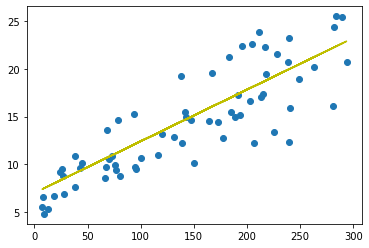

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()